# Mastercamp Data Science Project

## Préparation des données

On importe le dataset

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [96]:
df = pd.read_csv('assets/valeursfoncieres-2022.txt', sep='|', low_memory=True, dtype=str)

On regarde la data pour la première fois

In [97]:
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,24,1,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,140,3,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510


On vérifie sa forme et le nom de toutes ses colonnes

In [98]:
print('Shape: ', df.shape)
print('Columns: ', df.columns)

Shape:  (3803885, 43)
Columns:  Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')


On voit très vite que la target variable est "valeur fonciere"

On détermine les colonnes avec seulement des valeurs nulles et on les supprime

In [99]:
to_drop = df.columns[df.isnull().all()]
print('Columns with only NaN: ', to_drop)

Columns with only NaN:  Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'Identifiant local'],
      dtype='object')


In [100]:
df.drop(to_drop, axis=1, inplace=True)
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,000001,03/01/2022,Vente,"55000,00",13,NaN,RUE,2280,DE LA LIBERTE,1000,...,NaN,NaN,1,2,Appartement,24,1,NaN,NaN,NaN
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,84
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,88
3,000001,03/01/2022,Vente,"143000,00",98,NaN,RTE,0055,DE LA DOMBES,1480,...,NaN,NaN,1,2,Appartement,140,3,NaN,NaN,NaN
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,NaN,B031,AUX PIERRES,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,T,NaN,510


In [101]:
print('Le nombre de ligne possédant au moins une valeur NaN: ', df.isnull().any(axis=1).sum())

Le nombre de ligne possédant au moins une valeur NaN:  3803885


Toutes les lignes ont au moins une valeur nulle. Il va falloir faire un choix dans les colonnes à garder

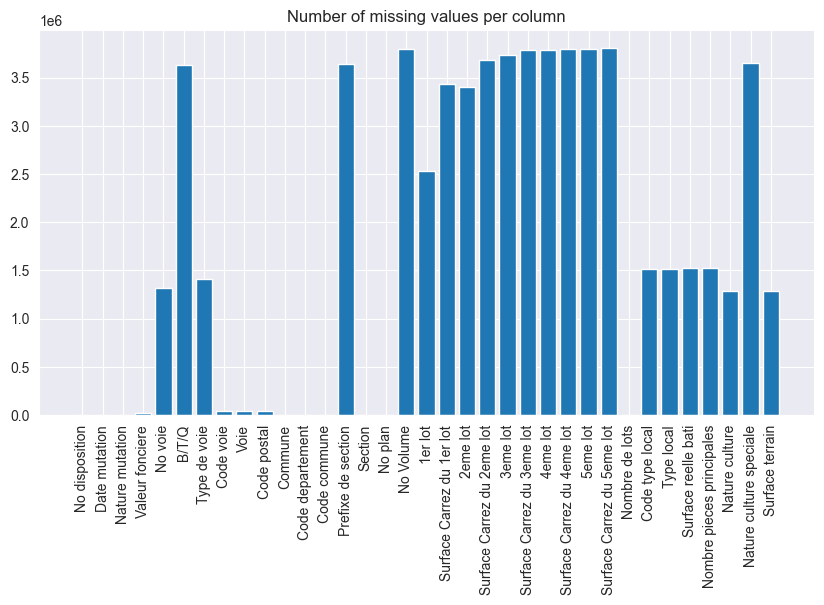

In [102]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

On aperçoie énormément de colonnes possédant beaucoup de valeurs nulles. Malheureusement, la valeur foncière dépend grandement de la surface Carrez (surface habitable selon la loi Carrez) ce qui risque de poser problème au vu du graphique.

In [103]:
print('Le nombre de ligne possédant au moins une valeur de surface Carrez: ', df[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].notnull().any(axis=1).sum())

Le nombre de ligne possédant au moins une valeur de surface Carrez:  499290


Ce nombre suffit à faire un dataset pertinent s'il n'est pas biaisé

En ce fiant à la documentation du dataset et au graphique, les colonnes "No voie", "B/T/Q" "Prefixe de section", "No Volume" possède beaucoup de valeurs nulles et peu de manières de les remplacer. On ferait mieux de s'en débarasser. De plus, on supprime les données ne possédant **AUCUNE** surface Carrez

In [104]:
df.drop(['No voie', 'B/T/Q', 'Prefixe de section', 'No Volume', 'Code type local'], axis=1, inplace=True)

df.dropna(subset=['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'], how='all', inplace=True)

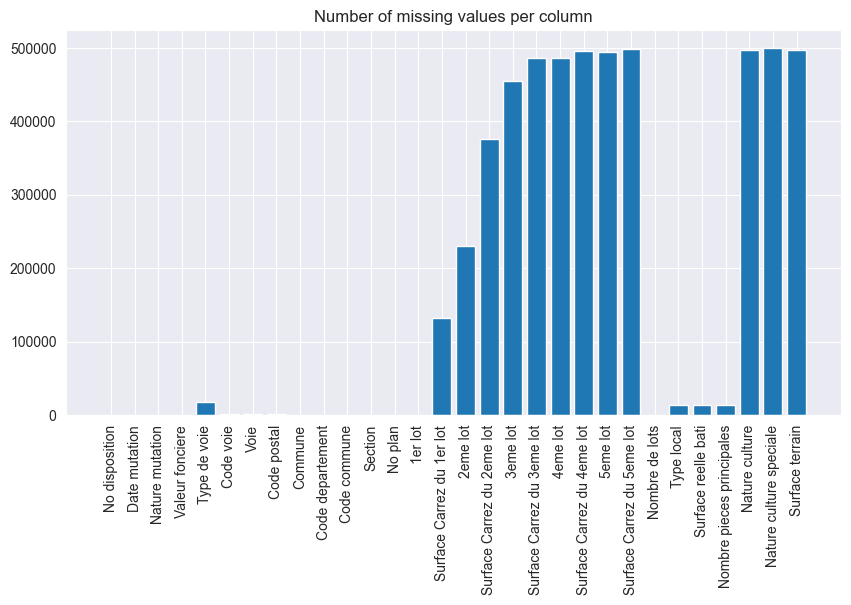

In [105]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

Nous n'avons pas besoin d'informations sur les terrains puisqu'elles sont toutes pratiquement nulles (le type de surface et la surface elle-même). Nous pouvons aussi faire disparaitre Code voie car nous avons la voie. De même pour commune car nous avons le code commune. On enlève ensuite les informations qui se ressemble (ex: référence cadastre de la parcelle, nous avons déjà le département ainsi que la commune)

In [106]:
df.drop(['1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot', 'Nature culture', 'Nature culture speciale', 'Surface terrain', 'Commune', 'Code voie', 'Section', 'No plan', 'No disposition'], axis=1, inplace=True)

On change le type de nos données et on s'occupe de la fin du nettoyage

In [107]:
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)

In [108]:
df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 2eme lot'] = df['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 3eme lot'] = df['Surface Carrez du 3eme lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 4eme lot'] = df['Surface Carrez du 4eme lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 5eme lot'] = df['Surface Carrez du 5eme lot'].str.replace(',', '.').astype(float).fillna(0)

In [109]:
df['Nombre de lots'] = df['Nombre de lots'].astype(int).fillna(0)
df['Nombre pieces principales'] = df['Nombre pieces principales'].astype(float).fillna(0)
df['Surface reelle bati'] = df['Surface reelle bati'].astype(float).fillna(0)

In [110]:
df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')

On labelise les colonnes qui sont des catégories

In [111]:
le = LabelEncoder()
df['Type de voie'] = le.fit_transform(df['Type de voie'])
df['Voie'] = le.fit_transform(df['Voie'])
df['Code postal'] = le.fit_transform(df['Code postal'])
df['Code commune'] = le.fit_transform(df['Code commune'])

In [112]:
# On crée une copie de df pour pouvoir la modifier sans perdre l'originale

df_copy = df.copy()


On nettoie une dernière fois avant l'analyse, il ne reste que très peu de NaN, on peut se permettre de les enlever comme cela

In [113]:
df.dropna(inplace=True)

On créée une colonne Surface Carrez totale

In [114]:
df['Surface Carrez totale'] = df['Surface Carrez du 1er lot'] + df['Surface Carrez du 2eme lot'] + df['Surface Carrez du 3eme lot'] + df['Surface Carrez du 4eme lot'] + df['Surface Carrez du 5eme lot']

# On fait de même pour df_copy
df_copy['Surface Carrez totale'] = df_copy['Surface Carrez du 1er lot'] + df_copy['Surface Carrez du 2eme lot'] + df_copy['Surface Carrez du 3eme lot'] + df_copy['Surface Carrez du 4eme lot'] + df_copy['Surface Carrez du 5eme lot']

## Analyses & graphiques

On load les data de 2019 pour pouvoir les comparer avec les valeurs de 2022

In [115]:
df_2019 = pd.read_csv('assets/valeursfoncieres-2019.txt', sep='|', low_memory=True, dtype=str)

In [116]:
# On nettoie le dataframe de la même manière que df

to_drop = df_2019.columns[df_2019.isnull().all()]
df_2019.drop(to_drop, axis=1, inplace=True)
df_2019.drop(['No voie', 'B/T/Q', 'Prefixe de section', 'No Volume', 'Code type local'], axis=1, inplace=True)
df_2019.dropna(subset=['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'], how='all', inplace=True)
df_2019.drop(['1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot', 'Nature culture', 'Nature culture speciale', 'Surface terrain', 'Commune', 'Code voie', 'Section', 'No plan', 'No disposition'], axis=1, inplace=True)
df_2019['Valeur fonciere'] = df_2019['Valeur fonciere'].str.replace(',', '.').astype(float)

df_2019['Surface Carrez du 1er lot'] = df_2019['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float).fillna(0)
df_2019['Surface Carrez du 2eme lot'] = df_2019['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float).fillna(0)
df_2019['Surface Carrez du 3eme lot'] = df_2019['Surface Carrez du 3eme lot'].str.replace(',', '.').astype(float).fillna(0)
df_2019['Surface Carrez du 4eme lot'] = df_2019['Surface Carrez du 4eme lot'].str.replace(',', '.').astype(float).fillna(0)
df_2019['Surface Carrez du 5eme lot'] = df_2019['Surface Carrez du 5eme lot'].str.replace(',', '.').astype(float).fillna(0)

df_2019['Nombre de lots'] = df_2019['Nombre de lots'].astype(int).fillna(0)
df_2019['Nombre pieces principales'] = df_2019['Nombre pieces principales'].astype(float).fillna(0)
df_2019['Surface reelle bati'] = df_2019['Surface reelle bati'].astype(float).fillna(0)

df_2019['Date mutation'] = pd.to_datetime(df_2019['Date mutation'], format='%d/%m/%Y')

df_2019['Type de voie'] = le.fit_transform(df_2019['Type de voie'])
df_2019['Voie'] = le.fit_transform(df_2019['Voie'])
df_2019['Code postal'] = le.fit_transform(df_2019['Code postal'])
df_2019['Code commune'] = le.fit_transform(df_2019['Code commune'])

df_2019.dropna(inplace=True)


On peut passer à l'analyse

In [117]:
df['Date mutation'] = df['Date mutation'].dt.to_period('M')
df_2019['Date mutation'] = df_2019['Date mutation'].dt.to_period('M')

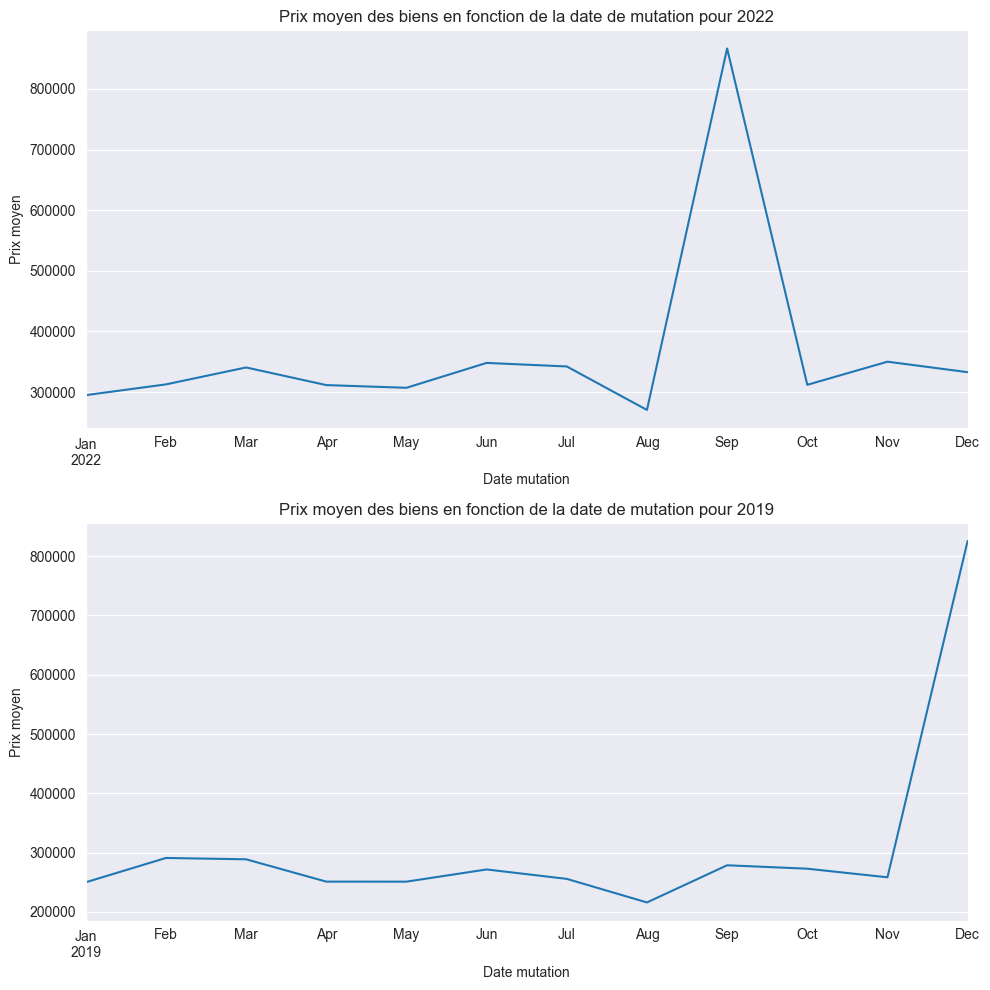

In [118]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

df.groupby('Date mutation')['Valeur fonciere'].mean().plot(ax=axs[0])
axs[0].set_title('Prix moyen des biens en fonction de la date de mutation pour 2022')
axs[0].set_xlabel('Date mutation')
axs[0].set_ylabel('Prix moyen')

df_2019.groupby('Date mutation')['Valeur fonciere'].mean().plot(ax=axs[1])
axs[1].set_title('Prix moyen des biens en fonction de la date de mutation pour 2019')
axs[1].set_xlabel('Date mutation')
axs[1].set_ylabel('Prix moyen')

plt.tight_layout()
plt.show()


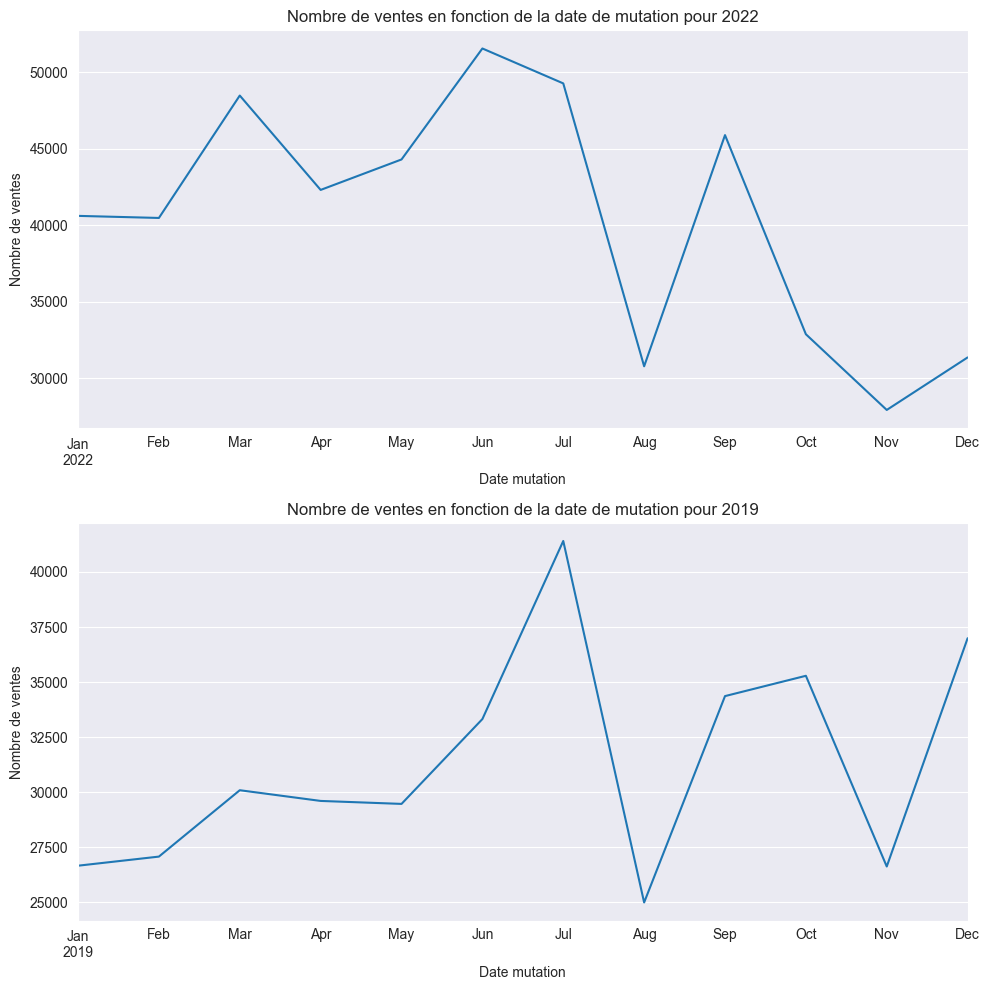

In [119]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

df.groupby('Date mutation')['Valeur fonciere'].count().plot(ax=axs[0])
axs[0].set_title('Nombre de ventes en fonction de la date de mutation pour 2022')
axs[0].set_xlabel('Date mutation')
axs[0].set_ylabel('Nombre de ventes')

df_2019.groupby('Date mutation')['Valeur fonciere'].count().plot(ax=axs[1])
axs[1].set_title('Nombre de ventes en fonction de la date de mutation pour 2019')
axs[1].set_xlabel('Date mutation')
axs[1].set_ylabel('Nombre de ventes')

plt.tight_layout()
plt.show()


On remarque que les mois font varier le prix de vente, cela a donc un impact sur la prédiction

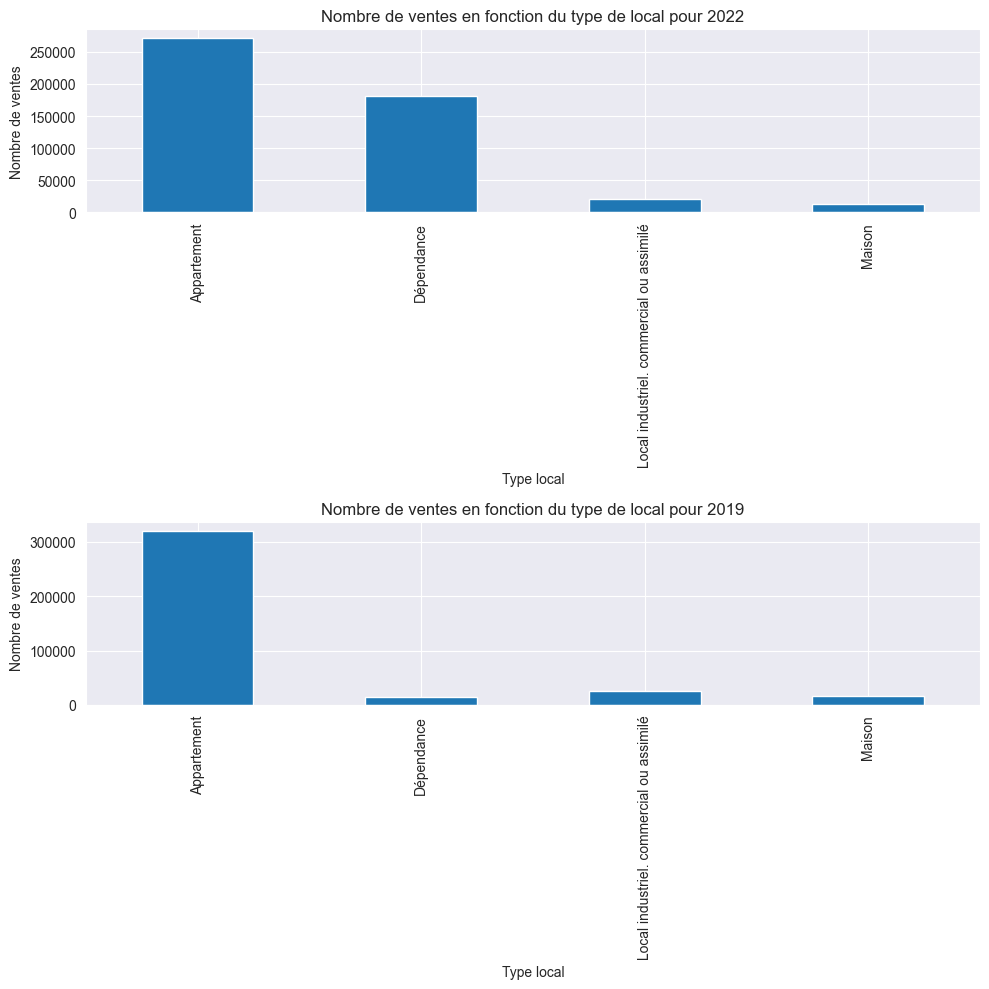

In [120]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

df.groupby('Type local')['Valeur fonciere'].count().plot(kind='bar', ax=axs[0])
axs[0].set_title('Nombre de ventes en fonction du type de local pour 2022')
axs[0].set_xlabel('Type local')
axs[0].set_ylabel('Nombre de ventes')

df_2019.groupby('Type local')['Valeur fonciere'].count().plot(kind='bar', ax=axs[1])
axs[1].set_title('Nombre de ventes en fonction du type de local pour 2019')
axs[1].set_xlabel('Type local')
axs[1].set_ylabel('Nombre de ventes')

plt.tight_layout()
plt.show()

df['Type local'] = le.fit_transform(df['Type local'])
df_2019['Type local'] = le.fit_transform(df_2019['Type local'])


0 : Appartement 
1 : Maison
2 : Dépendance
3 : Local

Nous n'avons pas un nombre égal de vente par type de local, cela pourra peut-être biaiser le résultat

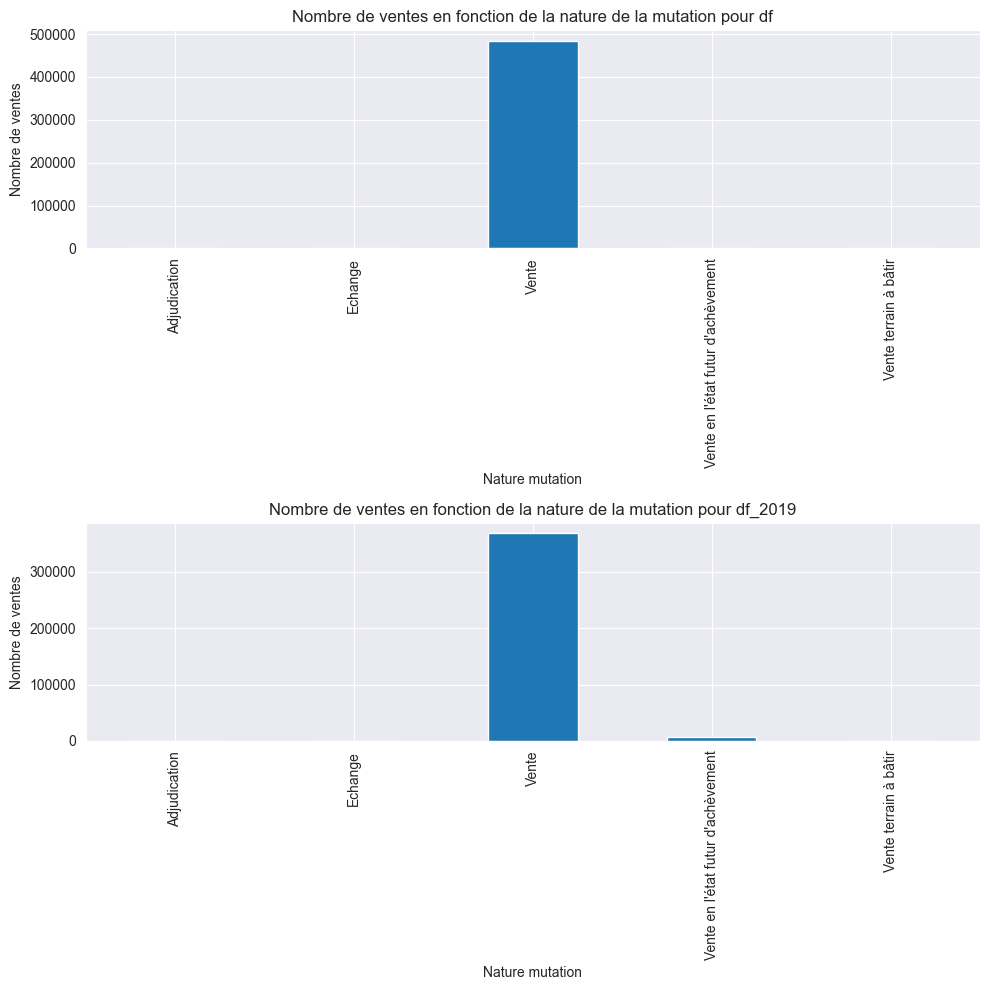

In [121]:
# Créer une figure avec deux subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Tracer le premier subplot
df.groupby('Nature mutation')['Valeur fonciere'].count().plot(kind='bar', ax=axs[0])
axs[0].set_title('Nombre de ventes en fonction de la nature de la mutation pour df')
axs[0].set_xlabel('Nature mutation')
axs[0].set_ylabel('Nombre de ventes')

# Tracer le deuxième subplot
df_2019.groupby('Nature mutation')['Valeur fonciere'].count().plot(kind='bar', ax=axs[1])
axs[1].set_title('Nombre de ventes en fonction de la nature de la mutation pour df_2019')
axs[1].set_xlabel('Nature mutation')
axs[1].set_ylabel('Nombre de ventes')

# Ajuster l'espace entre les subplots
plt.tight_layout()
plt.show()


df['Nature mutation'] = le.fit_transform(df['Nature mutation'])

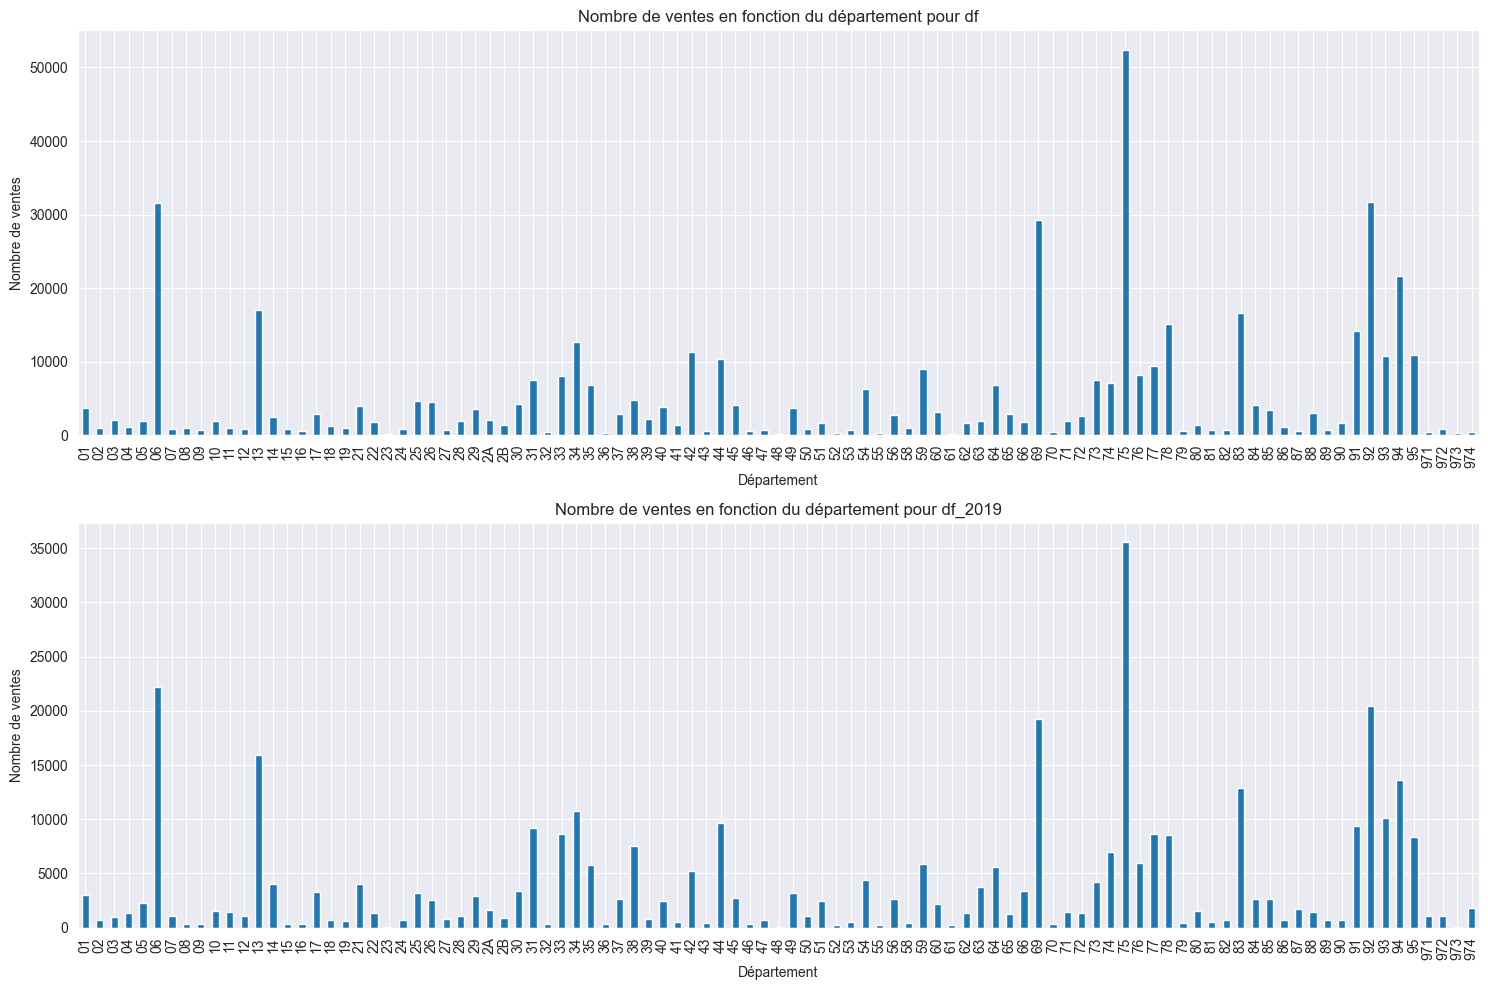

In [122]:
# Créer une figure avec deux subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Tracer le premier subplot
df.groupby('Code departement')['Valeur fonciere'].count().plot(kind='bar', ax=axs[0])
axs[0].set_title('Nombre de ventes en fonction du département pour df')
axs[0].set_xlabel('Département')
axs[0].set_ylabel('Nombre de ventes')

# Tracer le deuxième subplot
df_2019.groupby('Code departement')['Valeur fonciere'].count().plot(kind='bar', ax=axs[1])
axs[1].set_title('Nombre de ventes en fonction du département pour df_2019')
axs[1].set_xlabel('Département')
axs[1].set_ylabel('Nombre de ventes')

# Ajuster l'espace entre les subplots
plt.tight_layout()
plt.show()

df['Code departement'] = le.fit_transform(df['Code departement'])

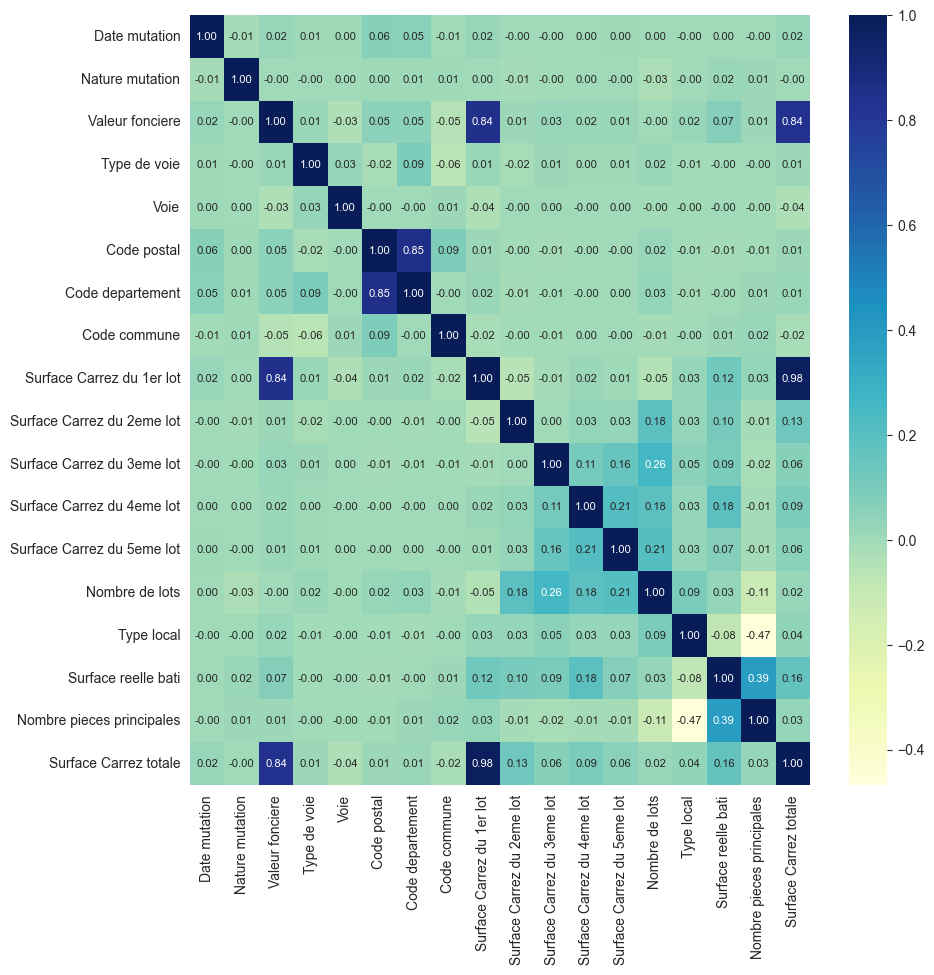

In [123]:
df['Date mutation'] = le.fit_transform(df['Date mutation'])
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={"size": 8})
plt.yticks(rotation=0, fontsize=10)
plt.show()

On se rend alors compte que la valeur foncière dépend évidemment de la surface Carrez

Analyse de la variable cible

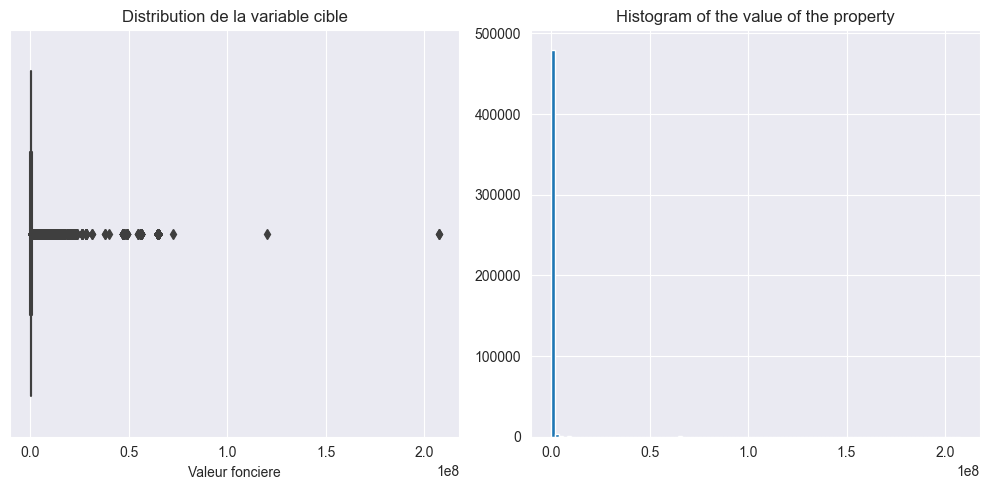

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Boxplot de la variable cible
sns.boxplot(x=df['Valeur fonciere'], ax=axs[0])
axs[0].set_title('Distribution de la variable cible')

# Histogramme de la valeur foncière
axs[1].hist(df['Valeur fonciere'], bins=100)
axs[1].set_title('Histogram of the value of the property')

plt.tight_layout()
plt.show()

Nos graphiques sont difficilement interprétables. On va utiliser le z-score pour enlever les outliers

In [125]:
# Enlever les outliers
from scipy import stats

z = np.abs(stats.zscore(df['Valeur fonciere']))
threshold = 2.5

df = df[(z < threshold)]

# de même pour df_2019
z = np.abs(stats.zscore(df_2019['Valeur fonciere']))
threshold = 2.5

df_2019 = df_2019[(z < threshold)]

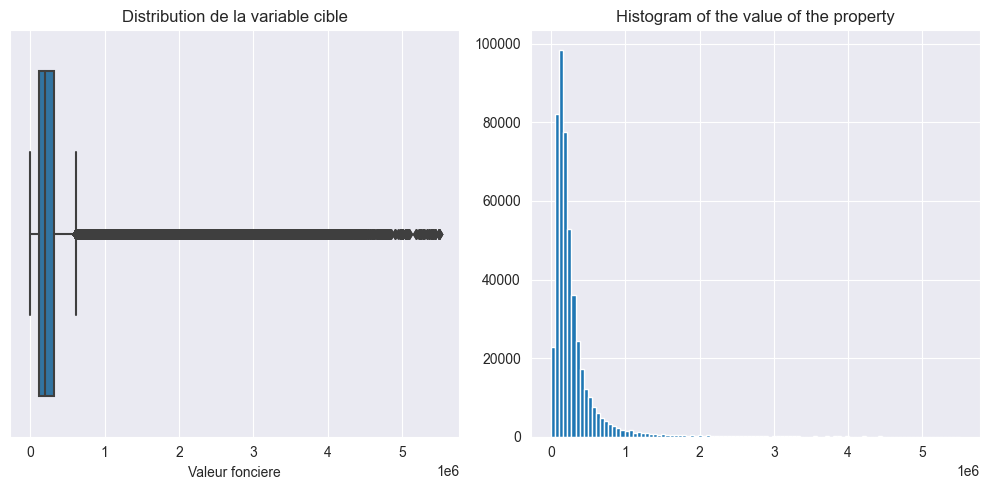

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Boxplot de la variable cible
sns.boxplot(x=df['Valeur fonciere'], ax=axs[0])
axs[0].set_title('Distribution de la variable cible')

# Histogramme de la valeur foncière
axs[1].hist(df['Valeur fonciere'], bins=100)
axs[1].set_title('Histogram of the value of the property')

plt.tight_layout()
plt.show()

Analyse Bi-variale - Geomaps

In [127]:
# Geomap valeure foncieres moyennes par département
import plotly.express as px

# Regrouper les données par code de département et calculer la moyenne des valeurs foncières
df_grouped = df_copy.groupby('Code departement')['Valeur fonciere'].mean().reset_index()

# Créer une carte avec Plotly
fig = px.choropleth(df_grouped, 
                    geojson="https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-avec-outre-mer.geojson", 
                    featureidkey="properties.code", 
                    locations='Code departement', 
                    color='Valeur fonciere',
                    color_continuous_scale="Sunset",
                    title='Valeurs foncières moyennes par département en France',
                    labels={'Valeurs foncières':'Valeur foncière moyenne'}
                   )

fig.update_geos(showcountries=False, showcoastlines=True, showland=True, fitbounds="locations")

fig.show()



In [128]:
# Geomap Surface Carrez totale moyennes par département

# Regrouper les données par code de département et calculer la moyenne des valeurs foncières
df_grouped = df_copy.groupby('Code departement')['Surface Carrez totale'].mean().reset_index()

# Créer une carte avec Plotly
fig = px.choropleth(df_grouped, 
                    geojson="https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-avec-outre-mer.geojson", 
                    featureidkey="properties.code", 
                    locations='Code departement', 
                    color='Surface Carrez totale',
                    color_continuous_scale="Sunset",
                    title='Surfaces Carrez totales moyennes par département en France',
                    labels={'Surface Carrez totale':'Surface Carrez totale moyenne'}
                   )

fig.update_geos(showcountries=False, showcoastlines=True, showland=True, fitbounds="locations")

fig.show()



In [129]:
# Geomap Nombre de lots moyens par département

# Regrouper les données par code de département et calculer la moyenne du nombre de lots
df_grouped = df_copy.groupby('Code departement')['Nombre de lots'].mean().reset_index()

# Créer une carte avec Plotly
fig = px.choropleth(df_grouped, 
                    geojson="https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-avec-outre-mer.geojson", 
                    featureidkey="properties.code", 
                    locations='Code departement', 
                    color='Nombre de lots',
                    color_continuous_scale="Sunset",
                    title='Nombre de lots moyens par département en France',
                    labels={'Nombre de lots': 'Nombre de lots moyen'}
                   )

fig.update_geos(showcountries=False, showcoastlines=True, showland=True, fitbounds="locations")

fig.show()



In [130]:
# Geomap Prix du m2 moyens par département

# Copier la dataframe df dans une nouvelle dataframe df_m2
df_m2 = df_copy.copy()

# calculer le prix du m2
df_m2['Prix du m2'] = df_m2['Valeur fonciere'] / df_m2['Surface Carrez totale']
df_m2.head()

# Regrouper les données par code de département et calculer la moyenne du prix du m2
df_grouped = df_m2.groupby('Code departement')['Prix du m2'].mean().reset_index()

# Créer une carte avec Plotly
fig = px.choropleth(df_grouped, 
                    geojson="https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-avec-outre-mer.geojson", 
                    featureidkey="properties.code", 
                    locations='Code departement', 
                    color='Prix du m2',
                    color_continuous_scale="Sunset",
                    title='Prix du m2 moyen par département en France',
                    labels={'Prix du m2': 'Prix du m2 moyen'}
                   )

fig.update_geos(showcountries=False, showcoastlines=True, showland=True, fitbounds="locations")

fig.show()
                    


## Modélisation

### Unsupervised

In [131]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [132]:
df_unsup = df.copy()

Essayons de faire une PCA pour voir ce qu'on obtient.

In [133]:
le = LabelEncoder()

original_cols = []
encoded_cols = []

for col in ['Nature mutation', 'Type de voie', 'Voie', 'Code postal', 'Code departement', 'Code commune', 'Type local']:
    df_unsup[col] = le.fit_transform(df_unsup[col].astype(str))
    original_cols.append(pd.DataFrame({f'{col}_original': le.classes_}))
    encoded_cols.append(pd.DataFrame({f'{col}_encoded': range(len(le.classes_))}))

original_df = pd.concat(original_cols, axis=1)
encoded_df = pd.concat(encoded_cols, axis=1)

merged_df = pd.concat([original_df, encoded_df], axis=1)

merged_df

,Nature mutation_original,Type de voie_original,Voie_original,Code postal_original,Code departement_original,Code commune_original,Type local_original,Nature mutation_encoded,Type de voie_encoded,Voie_encoded,Code postal_encoded,Code departement_encoded,Code commune_encoded,Type local_encoded
0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,1,1,1.0,1.0,1,1.0,1.0,1.0,1.0
2,2,10,10,10,10,10,2,2.0,2.0,2,2.0,2.0,2.0,2.0
3,3,100,1000,100,11,100,3,3.0,3.0,3,3.0,3.0,3.0,3.0
4,4,101,10000,1000,12,101,NaN,4.0,4.0,4,4.0,4.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47831,NaN,NaN,9995,NaN,NaN,NaN,NaN,NaN,NaN,47831,NaN,NaN,NaN,NaN
47832,NaN,NaN,9996,NaN,NaN,NaN,NaN,NaN,NaN,47832,NaN,NaN,NaN,NaN
47833,NaN,NaN,9997,NaN,NaN,NaN,NaN,NaN,NaN,47833,NaN,NaN,NaN,NaN
47834,NaN,NaN,9998,NaN,NaN,NaN,NaN,NaN,NaN,47834,NaN,NaN,NaN,NaN


Encoding pour chaque colonne de string.

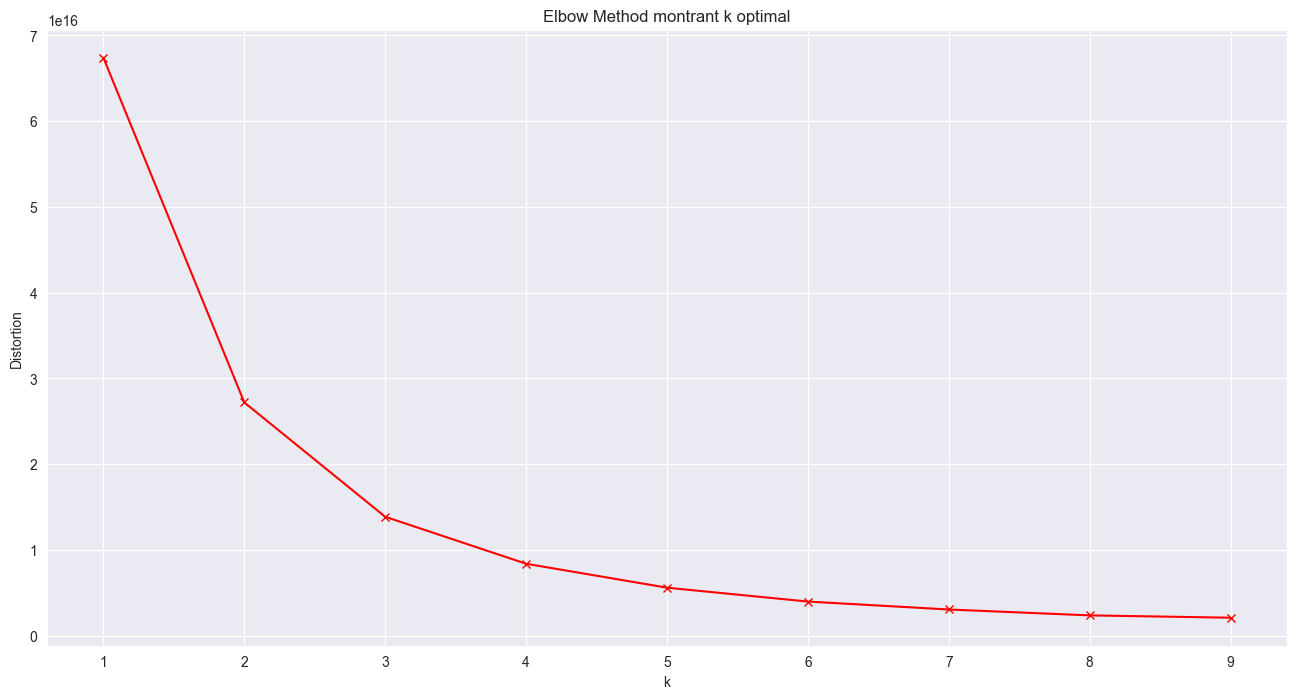

In [134]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_unsup)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto')
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'rx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method montrant k optimal')
plt.show()

Nous voyons que 2 semble être le nombre de clusters optimal.

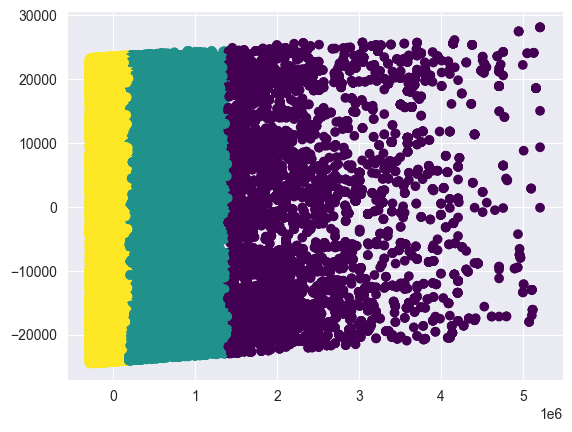

In [135]:
max_point = np.max(df_pca, axis=0)
indices = np.random.choice(df_pca.shape[0], 2, replace=False)
centroid_2 = df_pca[indices[0]]
centroid_3 = df_pca[indices[1]]

kmeans = KMeans(n_clusters=3, init=np.array([max_point, centroid_2, centroid_3]), n_init=1)

kmeans.fit(df_pca)
labels = kmeans.labels_
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')

Nous devrions avoir 99% du temps, le plus petit groupe étant celui des valeurs les plus élevées.

In [136]:
df_unsup['kmeans_labels'] = labels

# Trouve l'indice du point ayant la valeur la plus élevée sur l'axe des abscisses.
max_x_index = np.argmax(df_pca[:, 0])
# Trouve l'étiquette/cluster correspondant(e).
high_cluster = labels[max_x_index]

Les valeurs de high_cluster sont les plus hautes.

In [137]:
high_values = df_unsup[df_unsup['kmeans_labels'] == high_cluster]
high_values_mean = high_values[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez totale', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales']].mean()

In [138]:
normal_values = df_unsup[df_unsup['kmeans_labels'] != high_cluster]
normal_values_mean = normal_values[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez totale', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales']].mean()

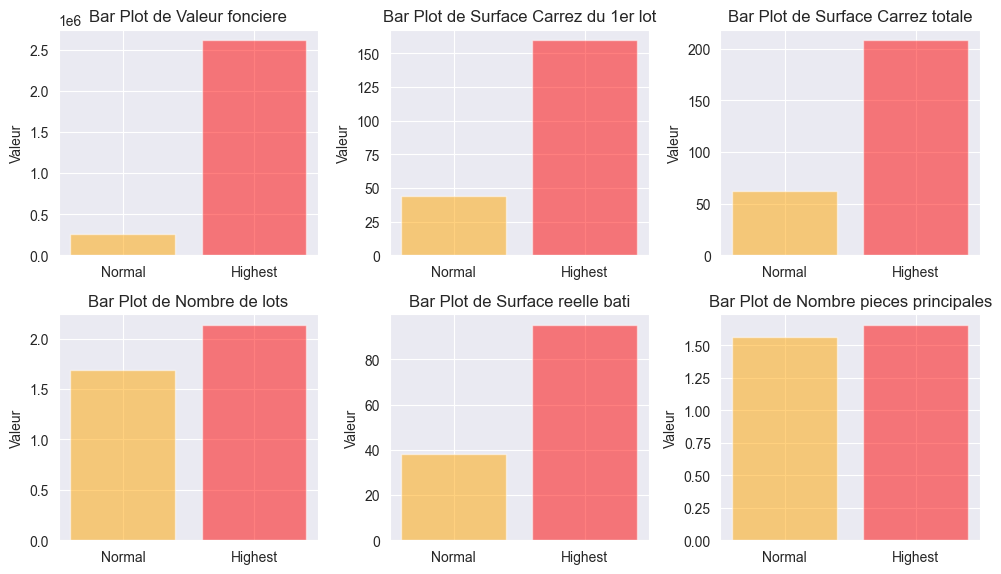

In [139]:
mean_df = pd.DataFrame({'Normal': normal_values_mean, 'Highest': high_values_mean})

# Ajuste les dimensions pour faire correspondre à une grille 2x3
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i, feature in enumerate(mean_df.index):
    # Convertis l'index en un index grille, chaque ligne possède 3 plots
    grid_idx = (i // 3, i % 3)

    axes[grid_idx].bar(['Normal', 'Highest'], mean_df.loc[feature], alpha=0.5, color=['orange', 'red'])
    axes[grid_idx].set_ylabel('Valeur')
    axes[grid_idx].set_title(f'Bar Plot de {feature}')

plt.tight_layout()
plt.show()

In [140]:
high_values_median = high_values[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez totale', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales']].median()

In [141]:
normal_values_median = normal_values[['Valeur fonciere', 'Surface Carrez du 1er lot', 'Surface Carrez totale', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales']].median()

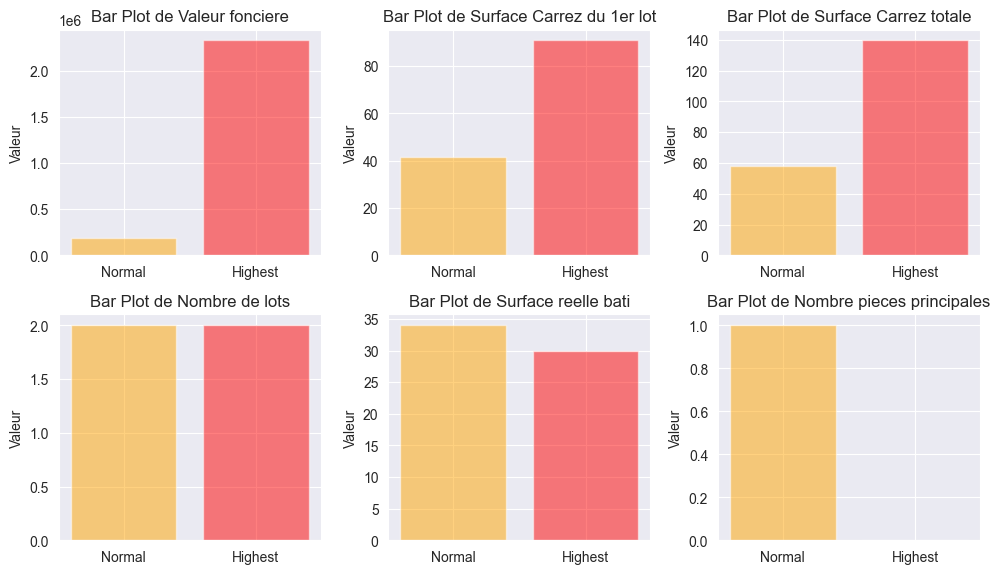

In [142]:
median_df = pd.DataFrame({'Normal': normal_values_median, 'Highest': high_values_median})

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i, feature in enumerate(median_df.index):
    grid_idx = (i // 3, i % 3)

    axes[grid_idx].bar(['Normal', 'Highest'], median_df.loc[feature], alpha=0.5, color=['orange', 'red'])
    axes[grid_idx].set_ylabel('Valeur')
    axes[grid_idx].set_title(f'Bar Plot de {feature}')

plt.tight_layout()
plt.show()

Les médianes sont aussi plus élevées en général pour les valeurs foncières et les surfaces comme vu précédemment avec les moyennes. On pourrait supposer que les valeurs des outliers sont systématiquement plus élevées dans ces domaines. Etudions donc plus ces domaines en particulier.

In [143]:
high_values

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Voie,Code postal,Code departement,Code commune,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface Carrez totale,kmeans_labels
11644,3,2,2328284.0,96,6643,3722,0,645,24.01,0.00,0.00,0.0,0.0,1,0,25.0,1.0,24.01,0
11645,3,2,2328284.0,96,6643,3722,0,645,92.63,0.00,0.00,0.0,0.0,1,2,147.0,0.0,92.63,0
11646,3,2,2328284.0,96,6643,3722,0,645,63.76,0.00,0.00,0.0,0.0,1,2,64.0,0.0,63.76,0
11648,3,2,2328284.0,96,6643,3722,0,645,70.02,0.00,0.00,0.0,0.0,1,0,69.0,3.0,70.02,0
11649,3,2,2328284.0,96,6643,3722,0,645,84.46,78.55,0.00,0.0,0.0,2,2,165.0,0.0,163.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803809,7,2,2280000.0,96,7599,2279,70,101,190.63,0.00,0.00,0.0,0.0,4,1,0.0,0.0,190.63,0
3803810,7,2,2280000.0,96,7599,2279,70,101,190.63,0.00,0.00,0.0,0.0,4,1,0.0,0.0,190.63,0
3803825,10,2,5260000.0,96,36092,2268,70,711,0.00,0.00,181.39,0.0,0.0,3,1,0.0,0.0,181.39,0
3803826,10,2,5260000.0,96,36092,2268,70,711,0.00,0.00,181.39,0.0,0.0,3,0,175.0,7.0,181.39,0


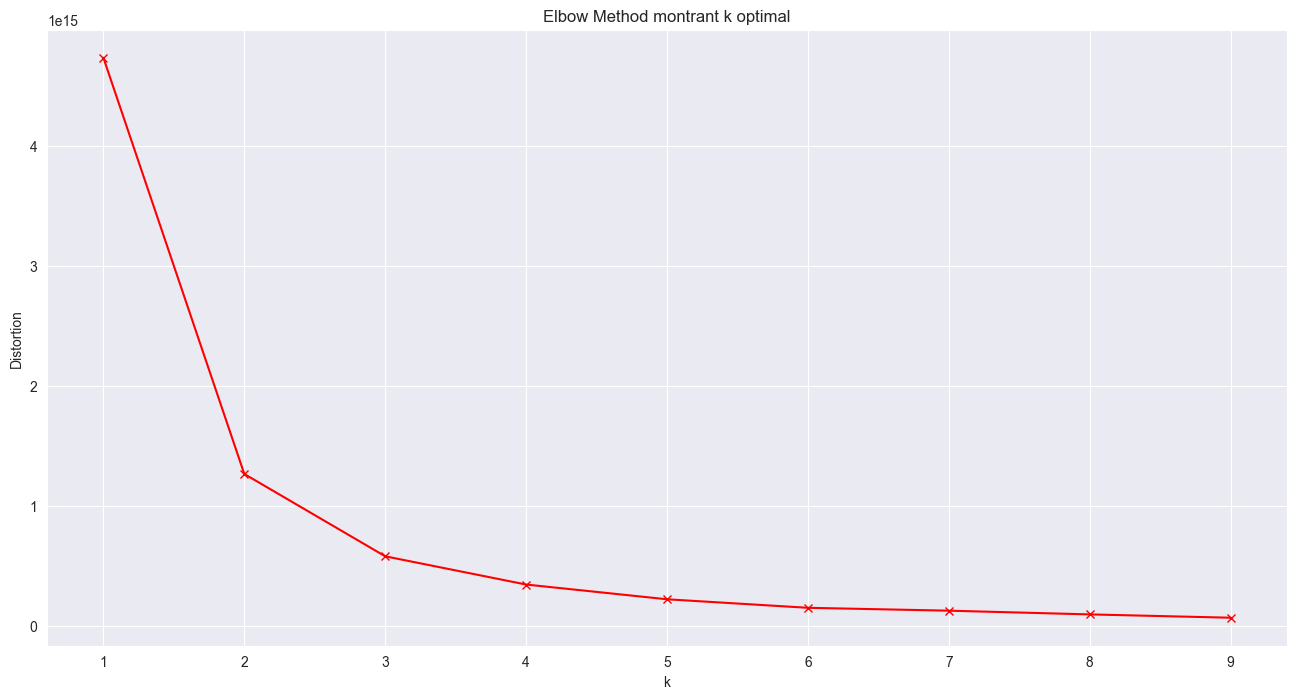

In [144]:
high_values_model = high_values[['Valeur fonciere', 'Surface Carrez totale', 'Surface reelle bati']]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto')
    kmeanModel.fit(high_values_model)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'rx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method montrant k optimal')
plt.show()

Prenons 3 comme nombre de clusters.

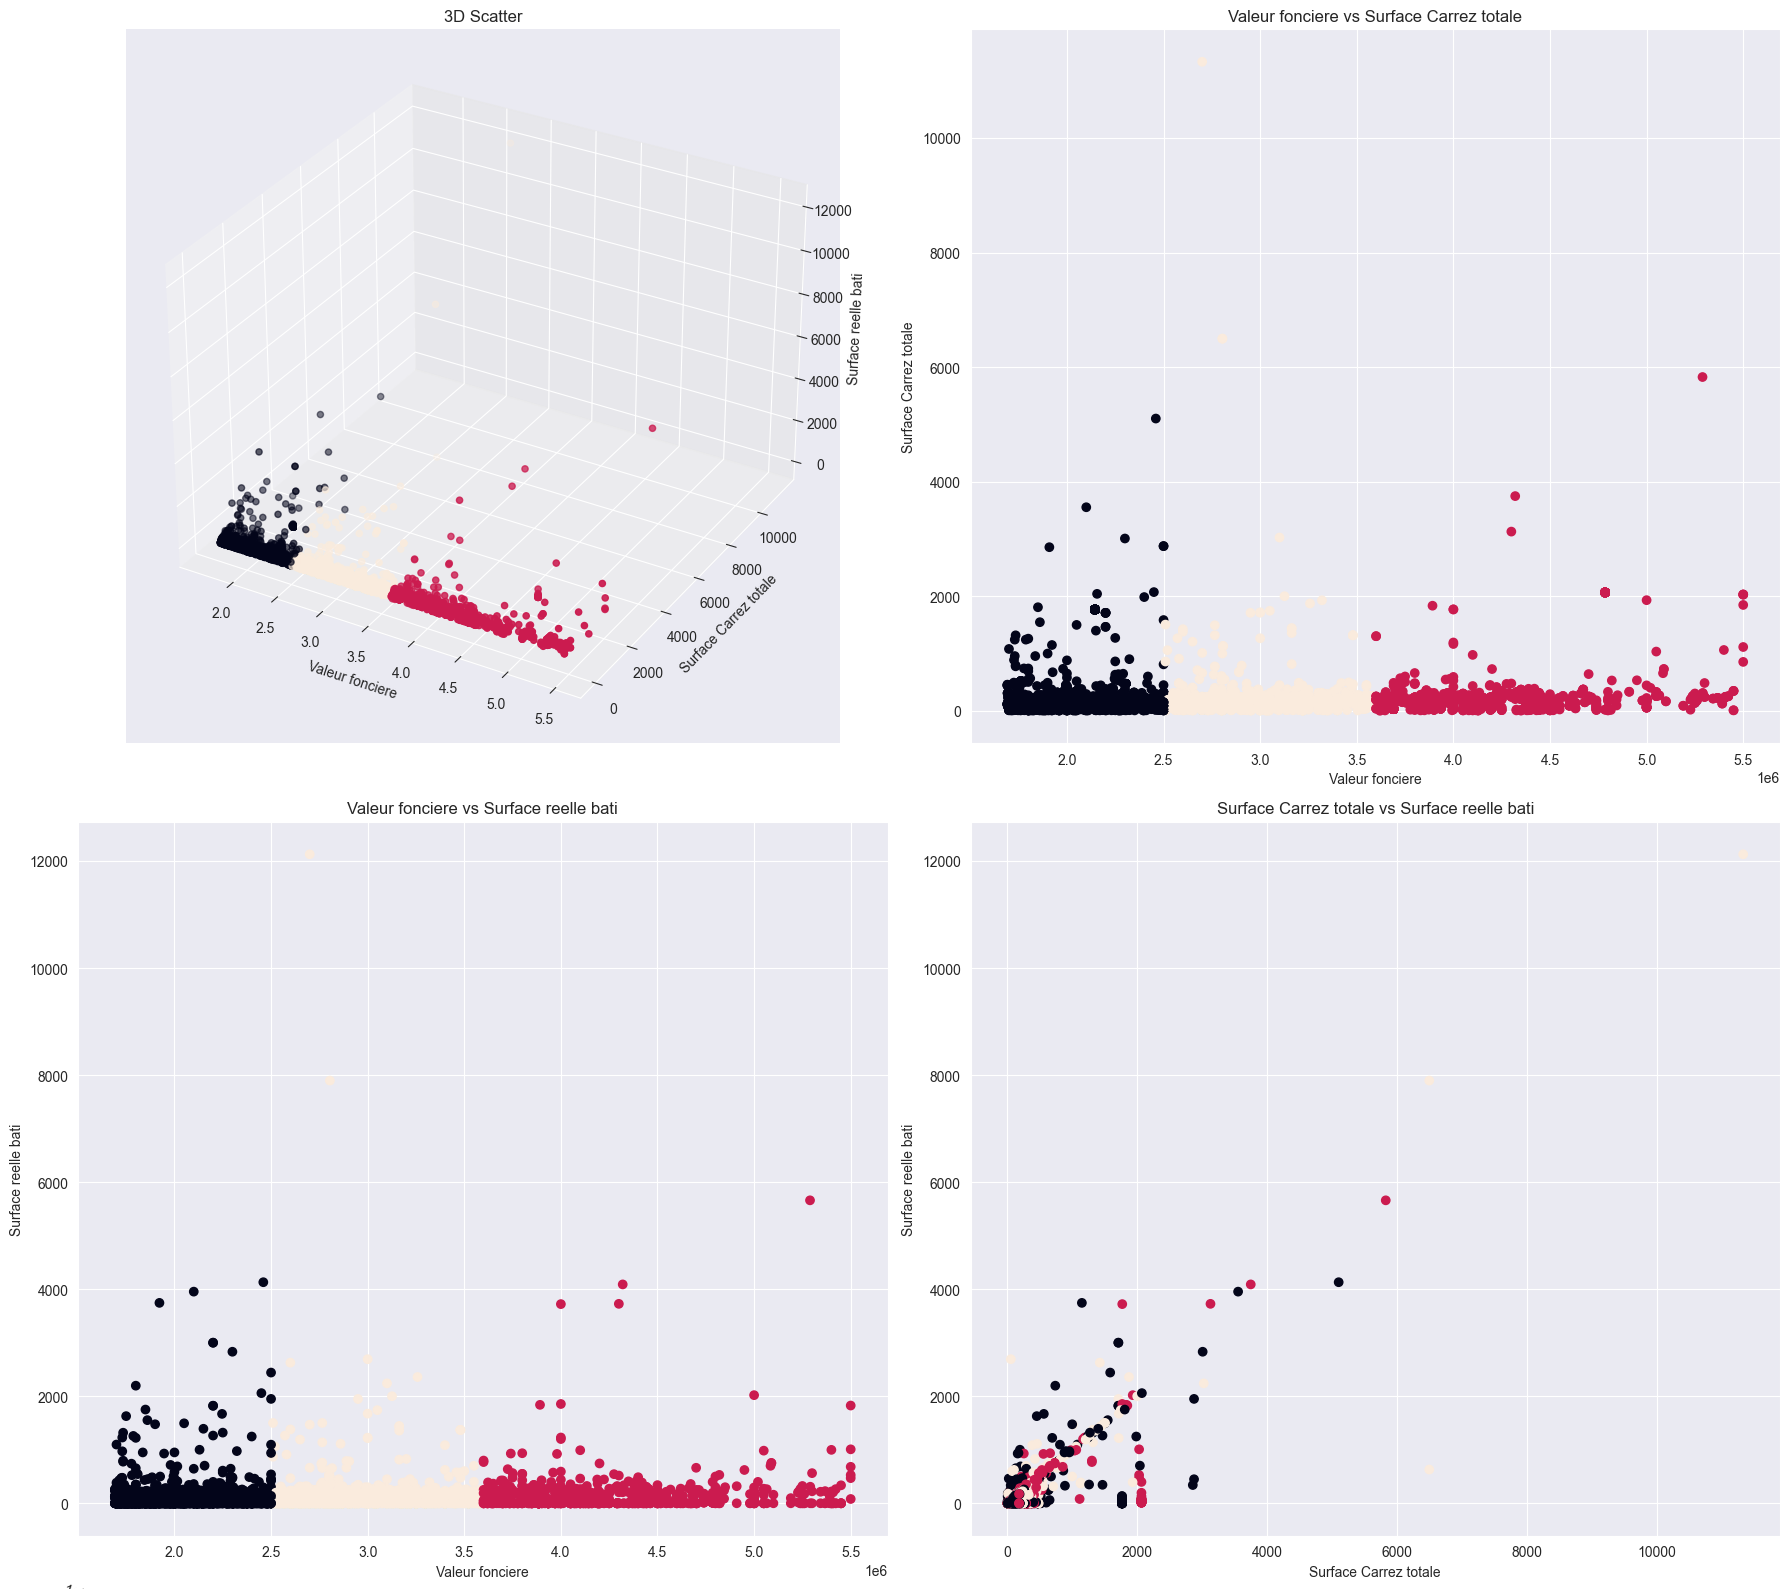

In [145]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(high_values_model)
labels = kmeans.labels_

fig = plt.figure(figsize=(18, 16))

# 3D scatter
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(high_values_model['Valeur fonciere'], high_values_model['Surface Carrez totale'], high_values_model['Surface reelle bati'], c=labels)
ax1.set_xlabel('Valeur fonciere')
ax1.set_ylabel('Surface Carrez totale')
ax1.set_zlabel('Surface reelle bati')

ax1.title.set_text('3D Scatter')

# 2D scatters de chaque paire
ax2 = fig.add_subplot(222)
ax2.scatter(high_values_model['Valeur fonciere'], high_values_model['Surface Carrez totale'], c=labels)
ax2.set_xlabel('Valeur fonciere')
ax2.set_ylabel('Surface Carrez totale')
ax2.title.set_text('Valeur fonciere vs Surface Carrez totale')

ax3 = fig.add_subplot(223)
ax3.scatter(high_values_model['Valeur fonciere'], high_values_model['Surface reelle bati'], c=labels)
ax3.set_xlabel('Valeur fonciere')
ax3.set_ylabel('Surface reelle bati')
ax3.title.set_text('Valeur fonciere vs Surface reelle bati')

ax4 = fig.add_subplot(224)
ax4.scatter(high_values_model['Surface Carrez totale'], high_values_model['Surface reelle bati'], c=labels)
ax4.set_xlabel('Surface Carrez totale')
ax4.set_ylabel('Surface reelle bati')
ax4.title.set_text('Surface Carrez totale vs Surface reelle bati')

plt.tight_layout()
plt.show()

Nous voyons que les clusters se sont formés principalement en fonction de la valeur foncière lorsqu'on voit les scatters de la surface réelle bâti et/ou la surface Carrez totale en fonction de la valeur foncière. On peut également en tirer cette conclusion juste en observant le scatter de la surface réelle bâti en fonction de la surface Carrez totale, où tous les clusters se retrouvent au même niveau, chacun emmêlé aux 2 autres.

Une possible explication pour cet incident serait que puisque KMeans fonctionne sur la base de la distance euclidienne, les caractéristiques avec des échelles plus grandes (ce qui est le cas de la valeur foncière) auront une influence disproportionnée sur les résultats. Ou alors, juste tout simplement que la valeur foncière est la feature la plus déterminante pour ces clusters.
Nous nous retrouvons avec deux options : soit nous normalisons/standardisons les données, soit nous exploitons ces disparités dans les regroupements à notre avantage.

Nous avons décidé d'en tirer parti de ces disparités.

In [146]:
# Drop les valeurs normales / Garde les valeurs les plus élevées
df_unsup = df_unsup[df_unsup['kmeans_labels'] == high_cluster]
df_unsup = df_unsup.drop(columns='kmeans_labels')

df_unsup['new_kmeans_labels'] = labels

In [147]:
# Les valeurs les plus hautes parmi les valeurs hautes
highest_values_cluster = df_unsup.loc[df_unsup['Valeur fonciere']==df_unsup['Valeur fonciere'].max()]['new_kmeans_labels'].unique()[0]
# Le numéro du cluster
highest_values_cluster

1

In [148]:
df_unsup = df_unsup[df_unsup['new_kmeans_labels']==highest_values_cluster]
df_unsup

,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Voie,Code postal,Code departement,Code commune,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface Carrez totale,new_kmeans_labels
118516,0,2,4050000.0,55,42719,1474,45,687,12.55,0.0,0.00,0.0,0.0,1,1,0.0,0.0,12.55,1
118517,0,2,4050000.0,55,42719,1474,45,687,300.90,0.0,0.00,0.0,0.0,2,1,0.0,0.0,300.90,1
118518,0,2,4050000.0,55,42719,1474,45,687,300.90,0.0,0.00,0.0,0.0,2,1,0.0,0.0,300.90,1
118521,0,2,4050000.0,55,42719,1474,45,687,300.90,0.0,0.00,0.0,0.0,2,0,291.0,6.0,300.90,1
119256,1,2,4000000.0,44,40994,1692,45,163,279.26,0.0,0.00,0.0,0.0,1,0,320.0,6.0,279.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803443,11,2,4100000.0,96,6391,2268,70,711,10.25,0.0,0.00,0.0,0.0,1,1,0.0,0.0,10.25,1
3803444,11,2,4100000.0,96,6391,2268,70,711,8.50,0.0,0.00,0.0,0.0,1,1,0.0,0.0,8.50,1
3803825,10,2,5260000.0,96,36092,2268,70,711,0.00,0.0,181.39,0.0,0.0,3,1,0.0,0.0,181.39,1
3803826,10,2,5260000.0,96,36092,2268,70,711,0.00,0.0,181.39,0.0,0.0,3,0,175.0,7.0,181.39,1


In [149]:
# Compte le nombre d'éléments par département
groupby_df = df_unsup.groupby('Code departement')['Valeur fonciere'].count()
groupby_df

Code departement
4       3
11      7
27     52
39      1
40      4
42     71
44      6
45    138
52      1
54      4
59      1
60      2
63     24
68     11
69      3
70    516
72      3
73      5
79      5
80     72
82      1
86     41
88     40
91     12
92      1
Name: Valeur fonciere, dtype: int64

On décode le LabelEncoding, et donc on redonne à chaque département son Code numéro correspondant

In [150]:
# Relève les valeurs uniques de 'Code departement_encoded' pour l'indexage.
unique_merged_df = merged_df.drop_duplicates(subset='Code departement_encoded', keep='first')
# Relève les valeurs de "Code departement" avant l'encodage des labels.
original_labels = unique_merged_df.set_index('Code departement_encoded')['Code departement_original'].to_dict()
# Revert l'encodage des labels vers les originaux
groupby_df.index = groupby_df.index.map(original_labels)
groupby_df

Code departement
12      3
19      7
33     52
44      1
45      4
47     71
49      6
5     138
56      1
58      4
62      1
63      2
66     24
70     11
71      3
72    516
74      3
75      5
80      5
81     72
83      1
87     41
89     40
91     12
92      1
Name: Valeur fonciere, dtype: int64

In [151]:
top_3 = groupby_df.nlargest(3)
top_3

Code departement
72    516
5     138
81     72
Name: Valeur fonciere, dtype: int64

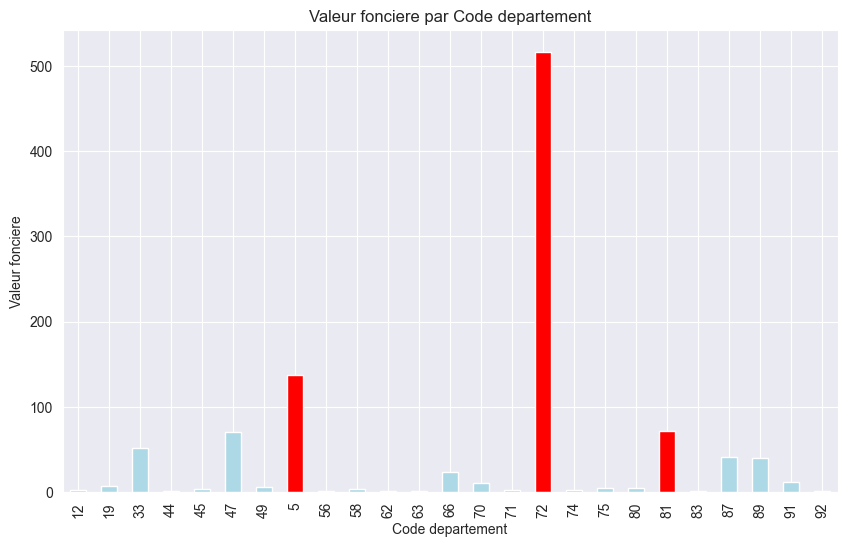

In [152]:
colors = ['red' if val in top_3.values else 'lightblue' for val in groupby_df.values]

groupby_df.plot(kind='bar', figsize=(10,6), color=colors)
plt.xlabel('Code departement')
plt.ylabel('Valeur fonciere')
plt.title('Valeur fonciere par Code departement')
plt.show()

Et donc, ici, vous voyez l'histogramme où le ratio Surface Carrez ou Surface réelle bâti sur la Valeur foncière est minime. En termes simples, vous voyez les départements où les prix des habitations sont élevées sans forcément qu'il y ait un grand espace pour y vivre.

### Supervised

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

On sépare en training et testing

In [154]:
X = df.drop(['Valeur fonciere'], axis=1)
y = df['Valeur fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((387354, 17), (96839, 17), (387354,), (96839,))

On créée une fonction pour vérifier la performance des modèles

In [155]:
def spearman_corr(estimator, X, y):
    y_pred = estimator.predict(X)
    return spearmanr(y, y_pred)[0]

In [156]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('[Training] R2 Score: ', lr_model.score(X_train, y_train))
print('[Training] Spearman correlation: ', spearman_corr(lr_model, X_train, y_train))

print('[Testing] R2 Score: ', lr_model.score(X_test, y_test))
print('[Testing] Spearman correlation: ', spearman_corr(lr_model, X_test, y_test))

[Training] R2 Score:  0.14181324222864788
[Training] Spearman correlation:  0.46460863470997177
[Testing] R2 Score:  0.10984594666032399
[Testing] Spearman correlation:  0.46646268548886


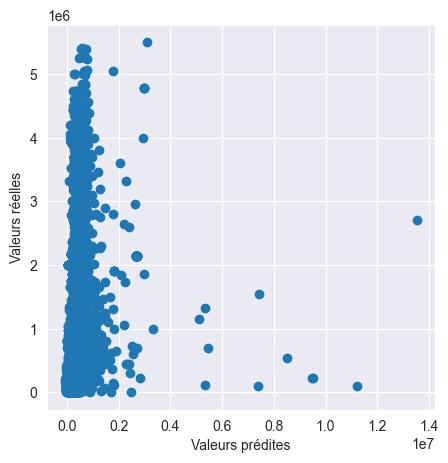

In [157]:
plt.figure(figsize=(5, 5))
plt.scatter(lr_model.predict(X_test), y_test)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.show()

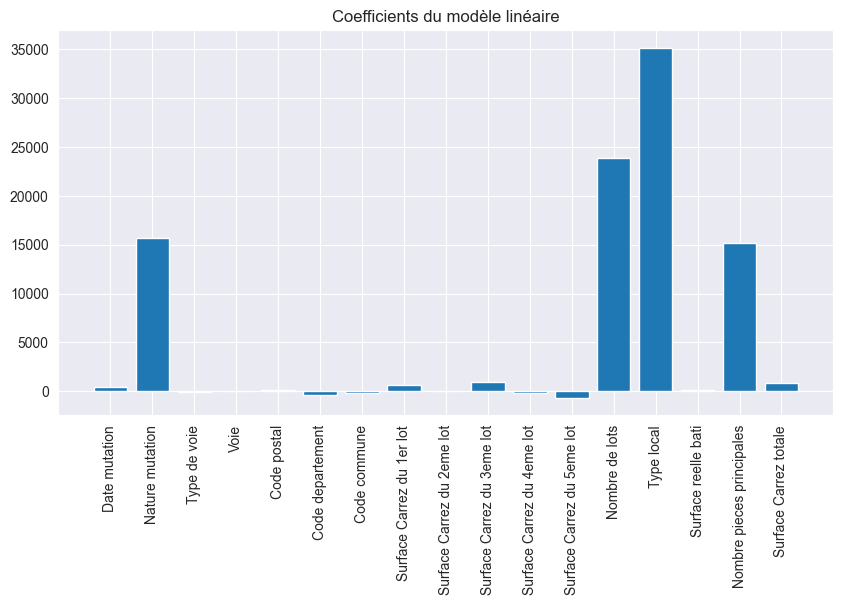

In [158]:
plt.figure(figsize=(10, 5))
plt.bar(X.columns, lr_model.coef_) 
plt.xticks(rotation=90)
plt.title('Coefficients du modèle linéaire')
plt.show()

In [159]:
knn_model = KNeighborsRegressor()
params = {'n_neighbors': [1, 3, 5]}
knn_grid = GridSearchCV(knn_model, params, cv=5, scoring=spearman_corr)
knn_grid.fit(X_train, y_train)

print('Best parameters: ', knn_grid.best_params_)
print('[Training] Best Spearman correlation: ', knn_grid.best_score_)
print('[Testing] Spearman: ', knn_grid.score(X_test, y_test))

Best parameters:  {'n_neighbors': 1}
[Training] Best Spearman correlation:  0.8166177554165148
[Testing] Spearman:  0.8370666871440621


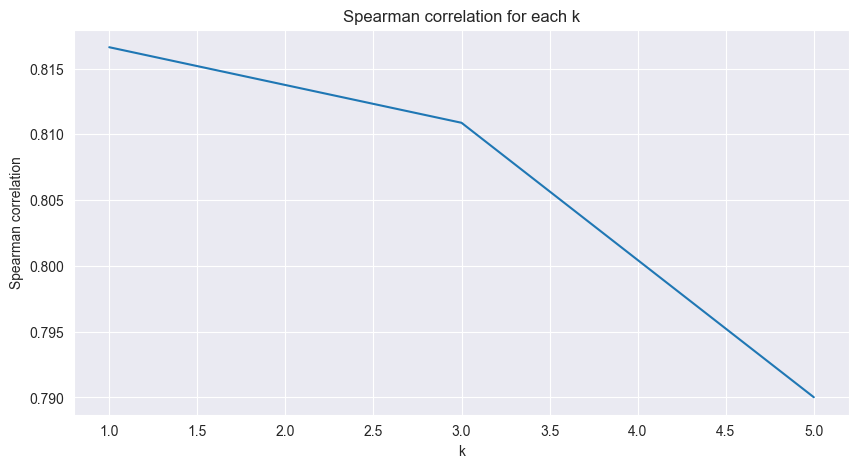

In [160]:
plt.figure(figsize=(10, 5))
plt.plot(knn_grid.cv_results_['param_n_neighbors'].data, knn_grid.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Spearman correlation')
plt.title('Spearman correlation for each k')
plt.show()

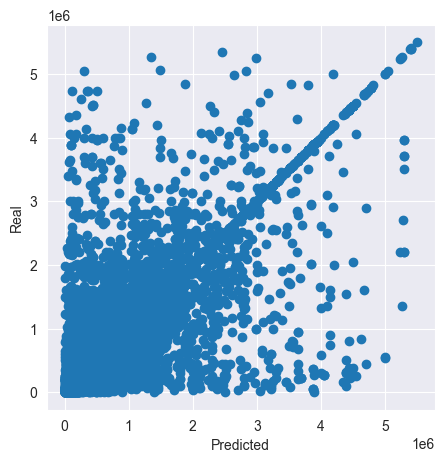

In [161]:
plt.figure(figsize=(5, 5))
plt.scatter(knn_grid.predict(X_test), y_test)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [162]:
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)

print('[Training] R2 Score: ', forest_model.score(X_train, y_train))
print('[Training] Spearman correlation: ', spearman_corr(forest_model, X_train, y_train))
print('[Testing] R2 Score: ', forest_model.score(X_test, y_test))
print('[Testing] Spearman correlation: ', spearman_corr(forest_model, X_test, y_test))

[Training] R2 Score:  0.9769619872415711
[Training] Spearman correlation:  0.9802903802844264
[Testing] R2 Score:  0.8441111425544467
[Testing] Spearman correlation:  0.9023609145858243


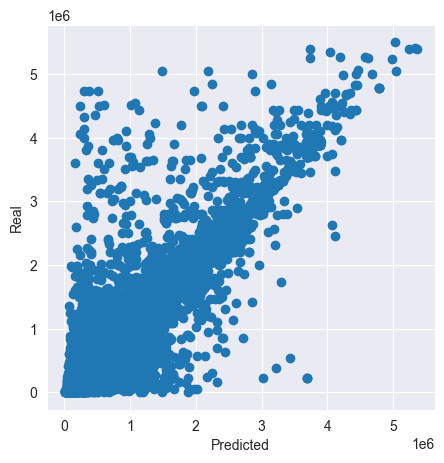

In [163]:
plt.figure(figsize=(5, 5))
plt.scatter(forest_model.predict(X_test), y_test)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

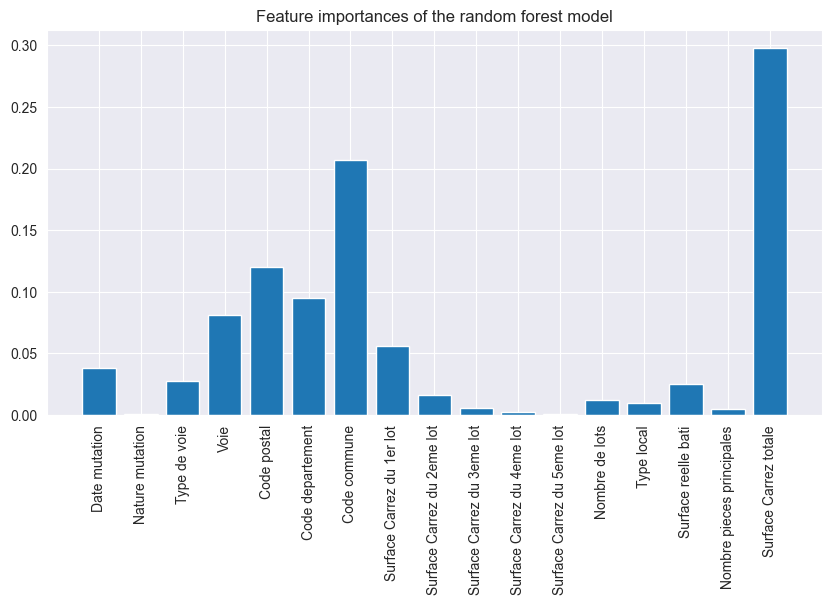

In [164]:
plt.figure(figsize=(10, 5))
plt.bar(X.columns, forest_model.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature importances of the random forest model')
plt.show()

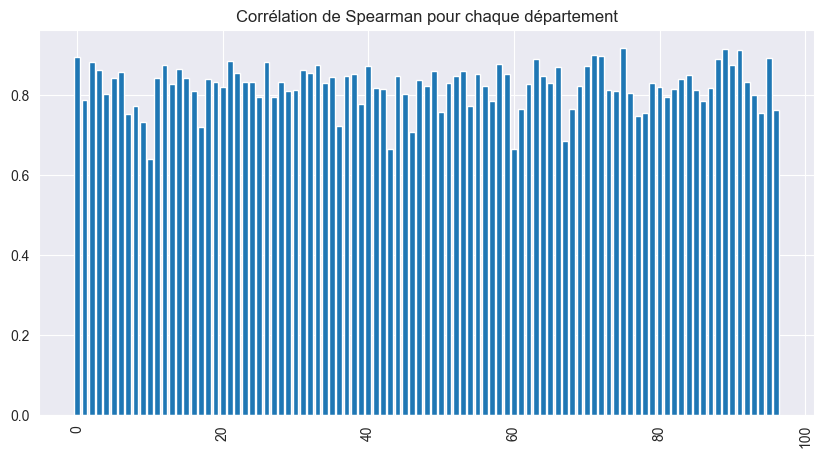

In [165]:
dict_dep = {}
model_dep = RandomForestRegressor(n_estimators=100)
for dep in df['Code departement'].unique():
    df_dep = df[df['Code departement'] == dep]
    X_dep = df_dep.drop(['Valeur fonciere'], axis=1)
    y_dep = df_dep['Valeur fonciere']

    X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X_dep, y_dep, test_size=0.2)

    model_dep.fit(X_train_dep, y_train_dep)
    dict_dep[dep] = spearman_corr(model_dep, X_test_dep, y_test_dep)

plt.figure(figsize=(10, 5))
plt.bar(dict_dep.keys(), dict_dep.values())
plt.xticks(rotation=90)
plt.title('Corrélation de Spearman pour chaque département')
plt.show()


In [166]:
dict_dep = {k: v for k, v in sorted(dict_dep.items(), key=lambda item: item[1], reverse=True)}
dict_dep

{75: 0.9173437796590519,
 89: 0.9163144259834916,
 91: 0.9130106484905562,
 71: 0.9001911306383743,
 72: 0.8984079529545329,
 0: 0.894870525129756,
 95: 0.8941942656895269,
 88: 0.8915824638734705,
 63: 0.8896827856842702,
 21: 0.8849320382404526,
 26: 0.8844210625678062,
 2: 0.8837782726180995,
 58: 0.8777192582701194,
 90: 0.8768756406645896,
 12: 0.8751376852214363,
 33: 0.87502457522943,
 40: 0.8733341017197098,
 70: 0.873331822613743,
 66: 0.8696856471893565,
 14: 0.8666204602511244,
 3: 0.8634855092283726,
 31: 0.8624245210386325,
 49: 0.8618118714897445,
 53: 0.8607766764042782,
 6: 0.8585089029504583,
 22: 0.8546106984623604,
 32: 0.8545596883252801,
 38: 0.8528581824335428,
 59: 0.8526260759677853,
 55: 0.8522630189906258,
 84: 0.8494920407445954,
 52: 0.848202411245301,
 64: 0.8480397374168727,
 44: 0.8478798635742084,
 37: 0.8476875233589185,
 35: 0.8453087167437923,
 11: 0.8440879308464384,
 5: 0.8426682535486535,
 15: 0.8425673196237292,
 18: 0.8415874773079973,
 83: 0.840